In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-dark")
df = pd.read_csv("global_freelancers_raw.csv", encoding="latin1")

# ***Data Exploration***

In [3]:
df.head()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [4]:
df.shape

(1000, 12)

In [5]:
df.columns

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

In [6]:
df.describe()

,age,years_of_experience,rating
count,970.000000,949.000000,899.000000
mean,40.509278,11.340358,2.512570
std,11.942605,9.680610,1.546599
min,20.000000,0.000000,0.000000
25%,31.000000,3.000000,1.400000
50%,41.000000,9.000000,2.600000
75%,51.000000,17.000000,3.800000
max,60.000000,41.000000,5.000000


In [7]:
df.describe(include="O")

,freelancer_ID,name,gender,country,language,primary_skill,hourly_rate (USD),is_active,client_satisfaction
count,1000,1000,1000,1000,1000,1000,906,911,824
unique,1000,992,10,21,16,10,18,8,81
top,FL251000,Amy Lee,FEMALE,South Korea,English,DevOps,40,1,68%
freq,1,2,115,68,215,112,94,190,23


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [9]:
df.isnull().sum()

freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64

In [10]:
df.tail()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
995,FL250996,Albert Wilcox,Male,56.0,Turkey,Turkish,DevOps,13.0,100,0.0,no,68%
996,FL250997,Cheryl Norris,f,26.0,Germany,German,Blockchain Development,6.0,USD 40,2.8,N,82
997,FL250998,Kathy Watkins,female,37.0,Japan,Japanese,Data Analysis,15.0,75,NaN,False,94%
998,FL250999,John Obrien,m,46.0,Russia,Russian,Machine Learning,22.0,100,2.8,yes,97
999,FL251000,Dawn Green,Female,36.0,Mexico,Spanish,UI/UX Design,18.0,$20,1.7,1,72


# ***Data Cleaning***

### 1. Formatting the column names

In [11]:
# Cleaning column Names
col_names = list()
for i in df.columns:
    if i.__contains__(" "):
        col_names.append(i.split()[0].title())
        continue
    col_names.append(i.title())
df.columns = col_names
df.columns

Index(['Freelancer_Id', 'Name', 'Gender', 'Age', 'Country', 'Language',
       'Primary_Skill', 'Years_Of_Experience', 'Hourly_Rate', 'Rating',
       'Is_Active', 'Client_Satisfaction'],
      dtype='object')

### 2. Removing Duplicate rows

In [12]:
df.drop_duplicates(inplace=True)

### 3. Handling NaN values

In [13]:
df.isna().sum()

Freelancer_Id            0
Name                     0
Gender                   0
Age                     30
Country                  0
Language                 0
Primary_Skill            0
Years_Of_Experience     51
Hourly_Rate             94
Rating                 101
Is_Active               89
Client_Satisfaction    176
dtype: int64

In [14]:
# Handling NaN values in Age column
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)

In [15]:
# Handling NaN values in Years_Of_Experience column
df["Years_Of_Experience"] = df["Years_Of_Experience"].fillna(df["Years_Of_Experience"].median())

In [16]:
# Handling NaN values in Hourly_Rate column
df["Hourly_Rate"] = df["Hourly_Rate"].replace(r"[^0-9]", "", regex=True).astype('float')
df["Hourly_Rate"] = df["Hourly_Rate"].fillna(df["Hourly_Rate"].median())

In [17]:
# Handling NaN values in Rating column
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [18]:
# Handling NaN values in Is_Active column
df["Is_Active"] = df["Is_Active"].str.strip().str.lower()
print(df["Is_Active"].unique())
replacements = {
    'n' : '0',
    'y' : '1',
    'false' : '0',
    'true' : '1',
    'yes' : '1',
    'no' : '0'
}
df["Is_Active"] = df["Is_Active"].replace(replacements)
df["Is_Active"] = df["Is_Active"].fillna(df["Is_Active"].mode()[0])
df["Is_Active"] = df["Is_Active"].astype(int)
df["Is_Active"].dtypes

['0' '1' 'n' 'false' 'true' 'yes' 'y' nan 'no']


dtype('int64')

In [19]:
# Handling NaN values in Client_Satisfaction column
df["Client_Satisfaction"] = df["Client_Satisfaction"].str.strip()
print(df["Client_Satisfaction"].unique())
df["Client_Satisfaction"] = df["Client_Satisfaction"].replace(r"[^0-9]", "", regex=True)
df["Client_Satisfaction"] = pd.to_numeric(df["Client_Satisfaction"], errors="coerce")
df["Client_Satisfaction"] = df["Client_Satisfaction"].fillna(round(df["Client_Satisfaction"].mean()))

[nan '84%' '71%' '90%' '83%' '94%' '76%' '77%' '86%' '93%' '70%' '69%'
 '60%' '87%' '75%' '68%' '65%' '100%' '92' '89%' '62%' '82' '81%' '63%'
 '67%' '80%' '74%' '85%' '79%' '72%' '64' '88' '96%' '96' '81' '61%' '97%'
 '64%' '73%' '88%' '72' '92%' '82%' '93' '83' '78' '95%' '80' '87' '66%'
 '78%' '68' '91%' '97' '60' '70' '99%' '76' '86' '95' '74' '100' '73' '67'
 '77' '98%' '71' '85' '91' '94' '84' '90' '62' '65' '75' '63' '61' '66'
 '99' '79' '69' '89']


In [20]:
df.isna().sum()

Freelancer_Id          0
Name                   0
Gender                 0
Age                    0
Country                0
Language               0
Primary_Skill          0
Years_Of_Experience    0
Hourly_Rate            0
Rating                 0
Is_Active              0
Client_Satisfaction    0
dtype: int64

### 4. Cleaning The Inconsistent Data

In [21]:
# Freelancer Id column
df["Freelancer_Id"] = df["Freelancer_Id"].str.strip()

In [22]:
# Name column
df["Name"] = df["Name"].str.strip().replace(r"[^a-zA-Z0-9 ]", "", regex=True)

In [23]:
# Gender Column
df["Gender"] = df["Gender"].str.lower().str.strip()
print(df["Gender"].unique())
replacements = {
    'f' : "Female",
    'female' : "Female",
    'm' : "Male",
    'male' : "Male"
}
df["Gender"] = df["Gender"].replace(replacements)
print(df["Gender"].unique())

['f' 'female' 'male' 'm']
['Female' 'Male']


In [24]:
# Country columnn
df["Country"].unique()
# Data is already organized perfectly

array(['Italy', 'Australia', 'Germany', 'Netherlands', 'Indonesia',
       'United States', 'Turkey', 'United Kingdom', 'Argentina', 'Japan',
       'India', 'Brazil', 'South Korea', 'Russia', 'Canada', 'France',
       'Egypt', 'South Africa', 'China', 'Mexico', 'Spain'], dtype=object)

In [25]:
# Language column
df["Language"].unique()
# Data is already organized perfectly

array(['Italian', 'English', 'German', 'Dutch', 'Indonesian', 'Turkish',
       'Spanish', 'Japanese', 'Hindi', 'Portuguese', 'Korean', 'Russian',
       'French', 'Arabic', 'Afrikaans', 'Mandarin'], dtype=object)

In [26]:
# Primary Skill column
df["Primary_Skill"].unique()
# Data is already organized perfectly

array(['Blockchain Development', 'Mobile Apps', 'Graphic Design',
       'Web Development', 'AI', 'Data Analysis', 'UI/UX Design',
       'Cybersecurity', 'DevOps', 'Machine Learning'], dtype=object)

# ***Loading Cleaned Dataset***

In [27]:
df.to_csv("global_freelancers_cleaned.csv")

# ***EDA - (Exploratory Data Analysis)***

In [28]:
df.head()

,Freelancer_Id,Name,Gender,Age,Country,Language,Primary_Skill,Years_Of_Experience,Hourly_Rate,Rating,Is_Active,Client_Satisfaction
0,FL250001,Ms Nicole Kidd,Female,52,Italy,Italian,Blockchain Development,11.0,100.0,2.6,0,79.0
1,FL250002,Vanessa Garcia,Female,52,Australia,English,Mobile Apps,34.0,100.0,3.3,1,84.0
2,FL250003,Juan Nelson,Male,53,Germany,German,Graphic Design,31.0,50.0,0.0,0,71.0
3,FL250004,Amanda Spencer,Female,38,Australia,English,Web Development,4.0,40.0,1.5,0,90.0
4,FL250005,Lynn Curtis DDS,Female,53,Germany,German,Web Development,27.0,30.0,4.8,0,83.0


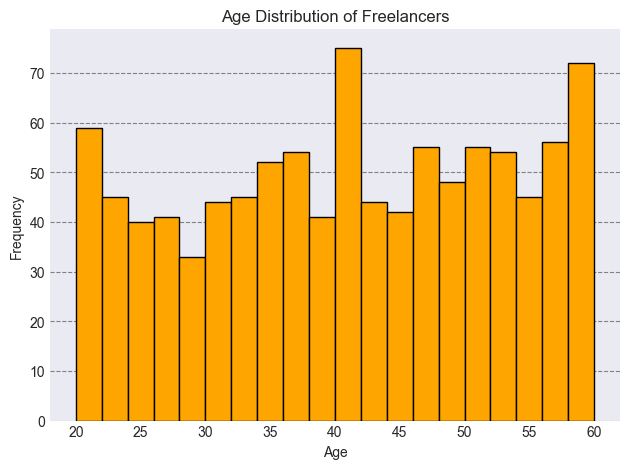

In [41]:
plt.figure()
plt.hist(df["Age"], edgecolor="black", bins=20, color="orange")
plt.title("Age Distribution of Freelancers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(True, axis="y", ls="--", color="grey")

- The freelancer age distribution is broadly spread between 20 and 60 years with relatively uniform frequency across age groups. This indicates that freelancing attracts professionals across diverse career stages. Combined with the experience distribution, it suggests that many individuals may transition into freelancing later rather than starting their careers there.

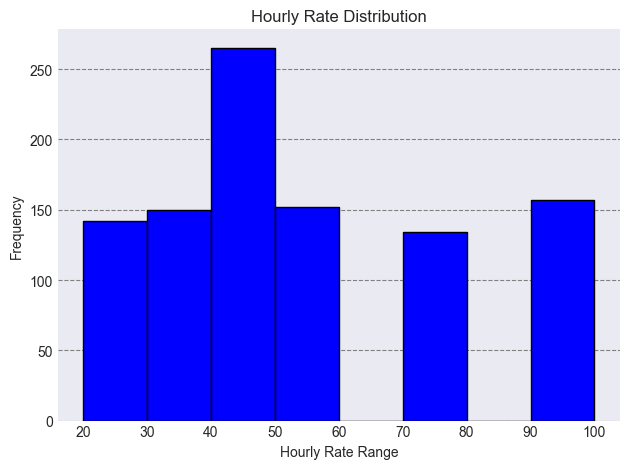

In [45]:
plt.hist(df["Hourly_Rate"], color="blue", edgecolor="black", bins=8)
plt.title("Hourly Rate Distribution")
plt.xlabel("Hourly Rate Range")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(ls="--", axis="y", color="grey")

- Hourly rates range from approximately $20 to $100, with the highest concentration of freelancers charging between 40 USD and 60 USD per hour.

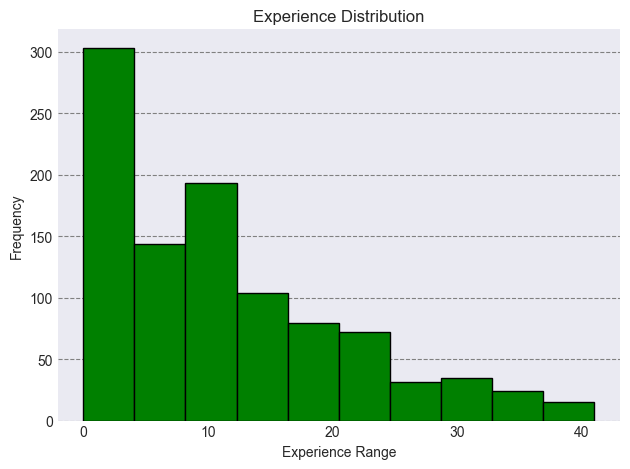

In [49]:
plt.hist(df["Years_Of_Experience"], color="green", edgecolor="black")
plt.title("Experience Distribution")
plt.xlabel("Experience Range")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(ls="--", color="grey", axis="y")

- The experience distribution is strongly right-skewed, with the largest concentration in the 0–4 year range, indicating the platform is dominated by early-career freelancers. Participation drops steadily with increasing experience, with only a small proportion of highly experienced professionals.

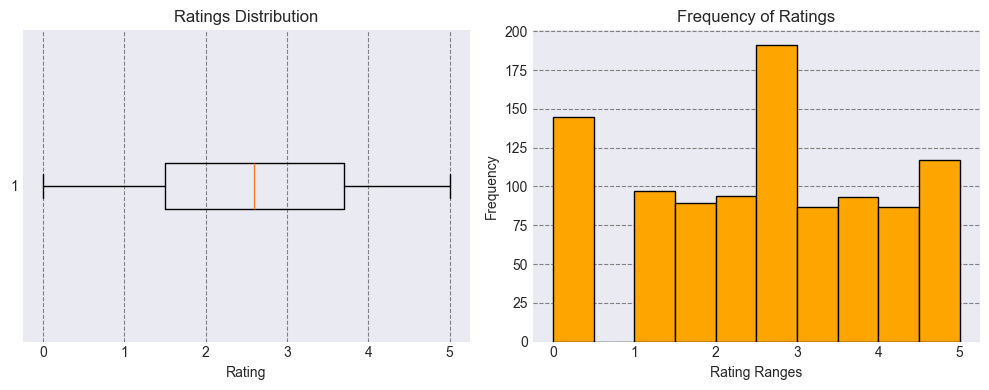

In [69]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df["Rating"], vert=False)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.tight_layout()
plt.grid(axis="x", ls="--", color="grey")

plt.subplot(1, 2, 2)
plt.hist(df["Rating"], color="orange", edgecolor="black")
plt.title("Frequency of Ratings")
plt.xlabel("Rating Ranges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(axis="y", ls="--", color="grey")

- Ratings are evenly distributed in between 1 - 5 and highest number of ratings are in between the range of 2.5 - 3.

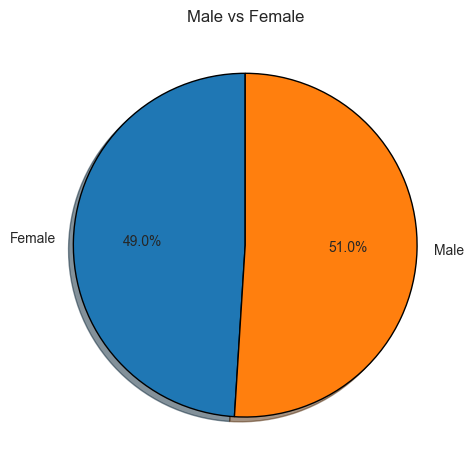

In [88]:
data = df.groupby("Gender").count().reset_index()[["Gender", "Name"]].rename(columns={"Name" : "Count"})

plt.pie(data["Count"], labels=data["Gender"], shadow=True, wedgeprops={"edgecolor" : "black"}, startangle=90, autopct="%1.1f%%")
plt.title("Male vs Female")
plt.tight_layout()

- Gender representation is approximately equal across the platform, with only a minor 1% higher share of male freelancers, indicating minimal gender imbalance.

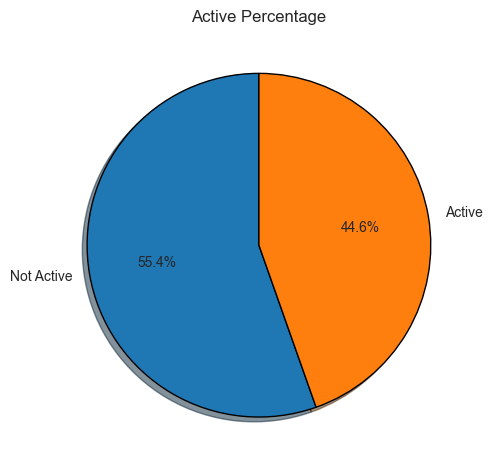

In [95]:
data = df.groupby("Is_Active").count().reset_index()[["Is_Active", "Name"]].rename(columns={"Name" : "Count"})

plt.pie(data["Count"], labels=["Not Active", "Active"], shadow=True, startangle=90, wedgeprops={"edgecolor" : "black"}, autopct="%1.1f%%")
plt.title("Active Percentage")
plt.tight_layout()

- The activity status distribution shows that about 55% of freelancers are currently inactive, while 45% are active, indicating a moderate inactivity majority on the platform.

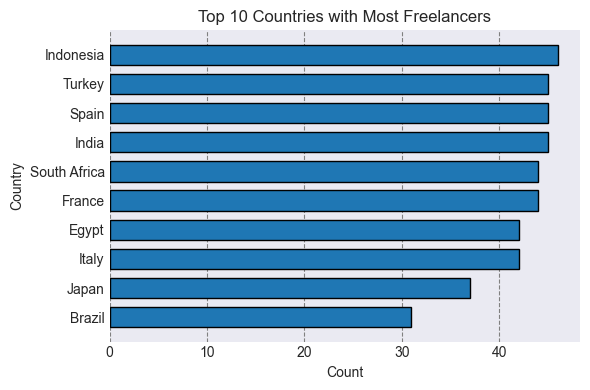

In [37]:
data = df.groupby("Country").count().reset_index()[["Country", "Name"]].rename(columns={"Name" : "Count"}).sort_values(by="Count")
data = data.reset_index(drop=True).head(10)

plt.figure(figsize=(6, 4))
plt.barh(data["Country"], data["Count"], height=0.7, edgecolor="black")
plt.title("Top 10 Countries with Most Freelancers")
plt.ylabel("Country")
plt.xlabel("Count")
plt.tight_layout()
plt.grid(True, ls="--", color="grey", axis="x")

1. Indonesia has the most freelancers among all the countries.
2. Turkey, Spain, India are having the same number of freelancers.
3. Top 8 countries are having freelancers above 40.

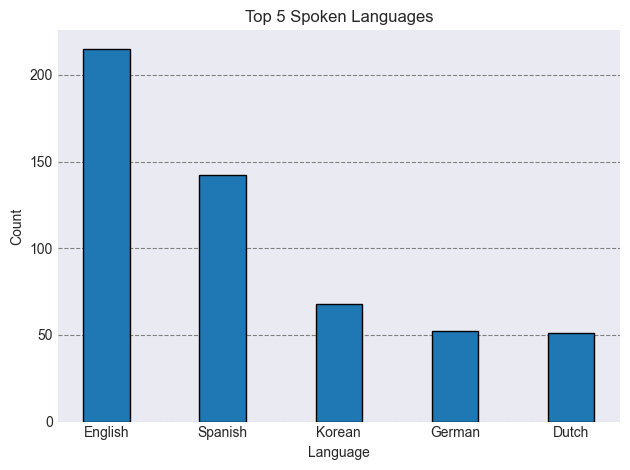

In [124]:
data = df.groupby("Language").count().reset_index().iloc[:, :2]
data.columns = ["Language", "Count"]
data = data.sort_values(by="Count", ascending=False).head().reset_index(drop=True)

plt.bar(data["Language"], data["Count"], edgecolor="black", width=0.4)
plt.title("Top 5 Spoken Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(axis="y", ls="--", color="grey")

1. English and Spanish are the most commonly spoken languages among freelancers, with English clearly dominating.
2. There is a significant drop in frequency after Spanish, with the remaining languages having considerably lower counts.

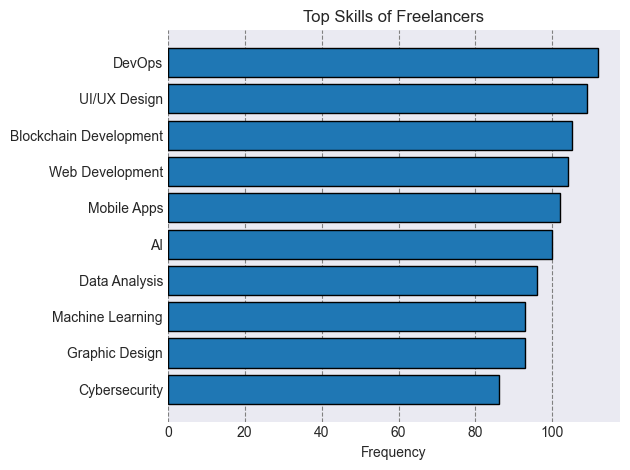

In [127]:
data = df.groupby("Primary_Skill").count().reset_index().iloc[:, :2]
data.columns = ["Primary_Skill", "Count"]
data = data.sort_values(by="Count").reset_index(drop=True)

plt.barh(data["Primary_Skill"], data["Count"], edgecolor="black")
plt.title("Top Skills of Freelancers")
plt.xlabel("Frequency")
plt.tight_layout()
plt.grid(axis="x", ls="--", color="grey")

1. DevOpes, UI/UX and Blockchain Development are the most common skills among the freelancers, indicating highest frequency among all the skills.
2. Web Development, and Mobile App Development also rank very high, indicating strong demand and participation in core tech/product-building domains.
3. AI, Data Analysis and Machine Learning are moderate in frequencies, appearing in mid-level section.
4. Graphic Design and Cybersecurity are the skills with least frequency, representing high demand.

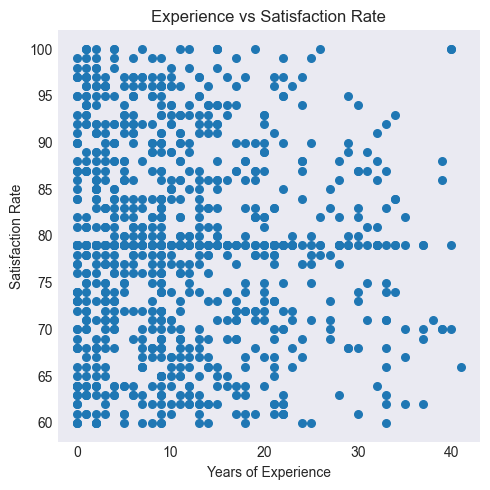

In [96]:
data = df[["Years_Of_Experience", "Client_Satisfaction"]].sort_values(by="Years_Of_Experience", ascending=False).reset_index(drop=True)

plt.figure(figsize=(5, 5))
plt.scatter(df["Years_Of_Experience"], df["Client_Satisfaction"], s=30)
plt.title("Experience vs Satisfaction Rate")
plt.xlabel("Years of Experience")
plt.ylabel("Satisfaction Rate")
plt.tight_layout()

- The scatter plot shows a wide dispersion of satisfaction scores across all experience levels, with no clear upward or downward trend. This suggests little to no visible relationship between years of experience and satisfaction rate.

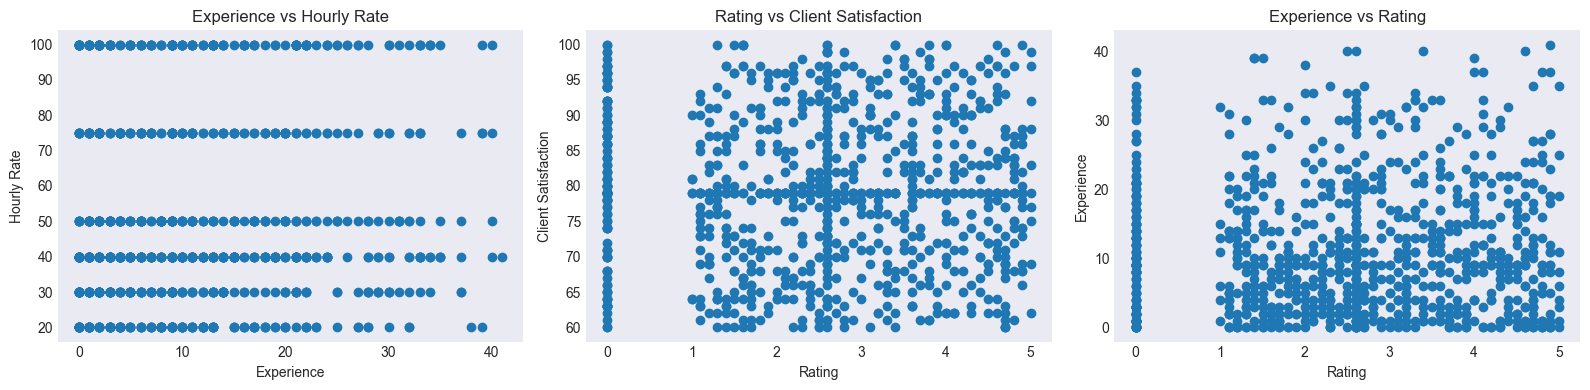

In [137]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(df["Years_Of_Experience"], df["Hourly_Rate"])
plt.title("Experience vs Hourly Rate")
plt.ylabel("Hourly Rate")
plt.xlabel("Experience")
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.scatter(df["Rating"], df["Client_Satisfaction"])
plt.title("Rating vs Client Satisfaction")
plt.ylabel("Client Satisfaction")
plt.xlabel("Rating")
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.scatter(df["Rating"], df["Years_Of_Experience"])
plt.title("Experience vs Rating")
plt.xlabel("Rating")
plt.ylabel("Experience")
plt.tight_layout()

- There is no relation between Experience and Hourly Rate, we can see that the person with 0yrs experience is getting paid 100USD and person with 40yrs experience is also getting paid 100USD.